In [1]:
%matplotlib inline

In [26]:
import json
import logging
import math
import os

import matplotlib.pyplot as plt
import numpy as np

In [3]:
def load_grid():
    path = os.path.join(os.environ['GOPATH'], 'src/github.com/srom/chessbot/estimator/train/grid/grid.json')
    print 'Loading grid from %s' % path
    with open(path, 'r') as f:
        return json.loads(f.read())
    

In [4]:
grid = load_grid()['grid']

Loading grid from /Users/srom/workspace/go/src/github.com/srom/chessbot/estimator/train/grid/grid.json


In [10]:
def sorted_best_scores(grid):
    scores = []
    for sq_nb, square in enumerate(grid):
        square_score = get_best_square_score(square, sq_nb)
        scores.append(square_score)
    return sorted(scores, key=lambda s: s['loss'])


def get_best_square_score(square, sq_nb):
    best_score = None
    for i, l in enumerate(square['test_losses']):
        if best_score is None or l < best_score['loss']:
            best_score = dict(
                loss=l,
                iteration=i,  
                learning_rate=square['learning_rate'], 
                epsilon=square['epsilon'],
                step=sq_nb,
            )
    return best_score

In [14]:
scores = sorted_best_scores(grid)

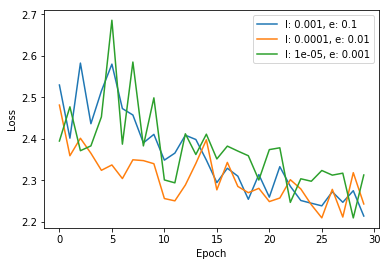

In [31]:
x = range(0, 30)
plots = []
best_params = [(b['learning_rate'], b['epsilon']) for b in scores[:3]]
for grid_square in grid:
    params = (grid_square['learning_rate'], grid_square['epsilon'])
    if params not in best_params:
        continue
    test_loss = grid_square['test_losses']
    learning_rate = grid_square['learning_rate']
    epsilon = grid_square['epsilon']
    l, = plt.plot(x, test_loss, label='l: {}, e: {}'.format(learning_rate, epsilon))
    plots.append(l)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(handles=plots)
plt.show()